# **A. Import Library**

Notebook ini dimulai dengan mengimpor pustaka yang diperlukan untuk analisis data, pemrosesan fitur, pemodelan, evaluasi, dan visualisasi.

In [1]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

Library
- pandas (pd) → Digunakan untuk membaca, membersihkan, dan mengelola data dalam bentuk tabel.
- numpy (np) → Digunakan untuk perhitungan numerik dan manipulasi array.
- matplotlib.pyplot (plt) → Untuk membuat grafik sederhana (line, bar, histogram).
- seaborn (sns) → Untuk visualisasi data yang lebih menarik seperti heatmap, boxplot, dll.
- RocCurveDisplay, roc_curve, auc → Digunakan untuk menampilkan dan menghitung - kurva ROC (menilai performa model klasifikasi).
- classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score → Untuk mengevaluasi performa model berdasarkan prediksi.
- StandardScaler → Untuk menstandarisasi fitur agar memiliki skala yang sama.
- LabelEncoder → Mengubah label kategori ke angka.
- label_binarize → Mengubah label multi-kelas ke format biner (untuk ROC).
- SelectKBest, f_classif → Untuk memilih fitur terbaik berdasarkan nilai statistik.
- RandomForestClassifier → Digunakan untuk klasifikasi berbasis banyak pohon keputusan.
- GradientBoostingClassifier → Digunakan untuk boosting model klasifikasi.
- SVC → Digunakan untuk klasifikasi dengan margin optimal (SVM).
- train_test_split → Untuk membagi dataset menjadi data latih dan data uji.
- GridSearchCV → Untuk mencari kombinasi hyperparameter terbaik.
- cross_val_score, StratifiedKFold → Untuk melakukan validasi silang yang adil dan konsisten antar kelas.
- SMOTE → Digunakan untuk menyeimbangkan dataset dengan menambahkan data sintetis pada kelas yang minoritas.


# **B. Data Loading & Overview**

Dataset dimuat dari file .csv menggunakan pandas.

In [2]:
# LOAD DATA
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## **1. Informasi Dataset**

Mengecek tipe data dan memastikan tidak ada error dalam format data. dan juga Untuk memahami struktur dataset secara keseluruhan

In [4]:
# EKSPLORASI DATA
print("Informasi Dataset:\n")
print(data.info())

Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF           

## **2.  Statistik Deskriptif**

memberikan ringkasan data numerik dengan statistik dasar seperti mean, std, min, max. Pada dataset Obesity Level

In [5]:
print("\nStatistik Deskriptif:\n")
print(data.describe())


Statistik Deskriptif:

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.00

## **3. Cek Missing Values**

Cek apakah ada nilai yang hilang (null) dalam dataset.

In [6]:
print("\nJumlah Nilai Kosong:\n")
print(data.isnull().sum())


Jumlah Nilai Kosong:

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## **4. Cek duplicate rows**

Menemukan dan menghitung baris duplikat.

In [7]:
print("\n=== Duplicate Rows ===")
print(f"Total duplicate rows: {data.duplicated().sum()}")


=== Duplicate Rows ===
Total duplicate rows: 24


# **C. EDA (Exploratory Data Analysis)**

Pada tahap ini kita akan melakukan Visualisasi dan juga analsis , dari distribusi data untuk memahami pola, memahami data dan juga untuk menentukan fitur fitur yang importance untuk Obesity Level ini

## **1. Distribusi Kelas Target**

Visualisasi distribusi dari label target NObeyesdad.

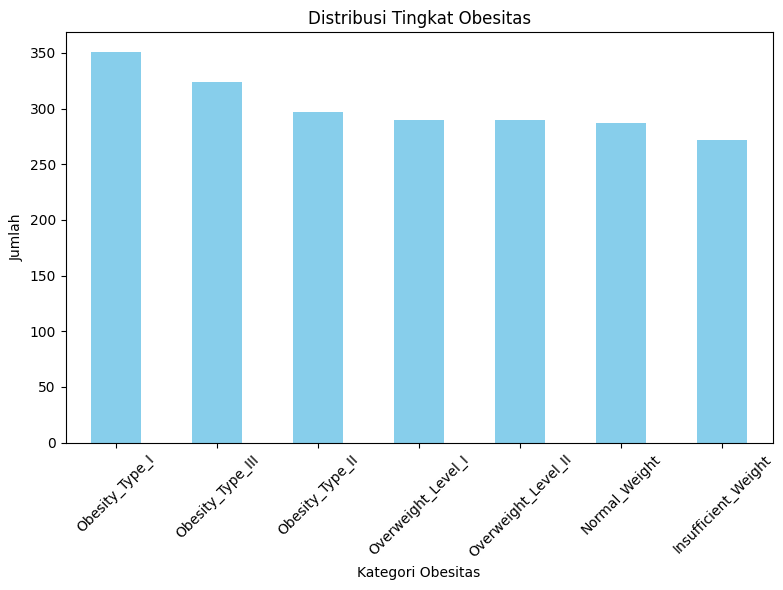

In [8]:
# Distribusi target
plt.figure(figsize=(8, 6))
data['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Tingkat Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari hasil Distribusi kelas target Data didominasi oleh kategori Obesity_Type_I, sementara kelas seperti Insufficient_Weight jumlahnya jauh lebih sedikit. Ketidakseimbangan ini berpotensi membuat model bias terhadap kelas mayoritas, sehingga perlu penanganan khusus seperti resampling agar hasil prediksi lebih akurat dan adil di semua kelas.

## **2. Distribusi Fitur Kategorikal**

Visualisasi distribusi fitur kategorikal seperti gender, kebiasaan merokok, dll.

<ipython-input-9-37b83642c705>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')
<ipython-input-9-37b83642c705>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')
<ipython-input-9-37b83642c705>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')
<ipython-input-9-37b83642c705>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

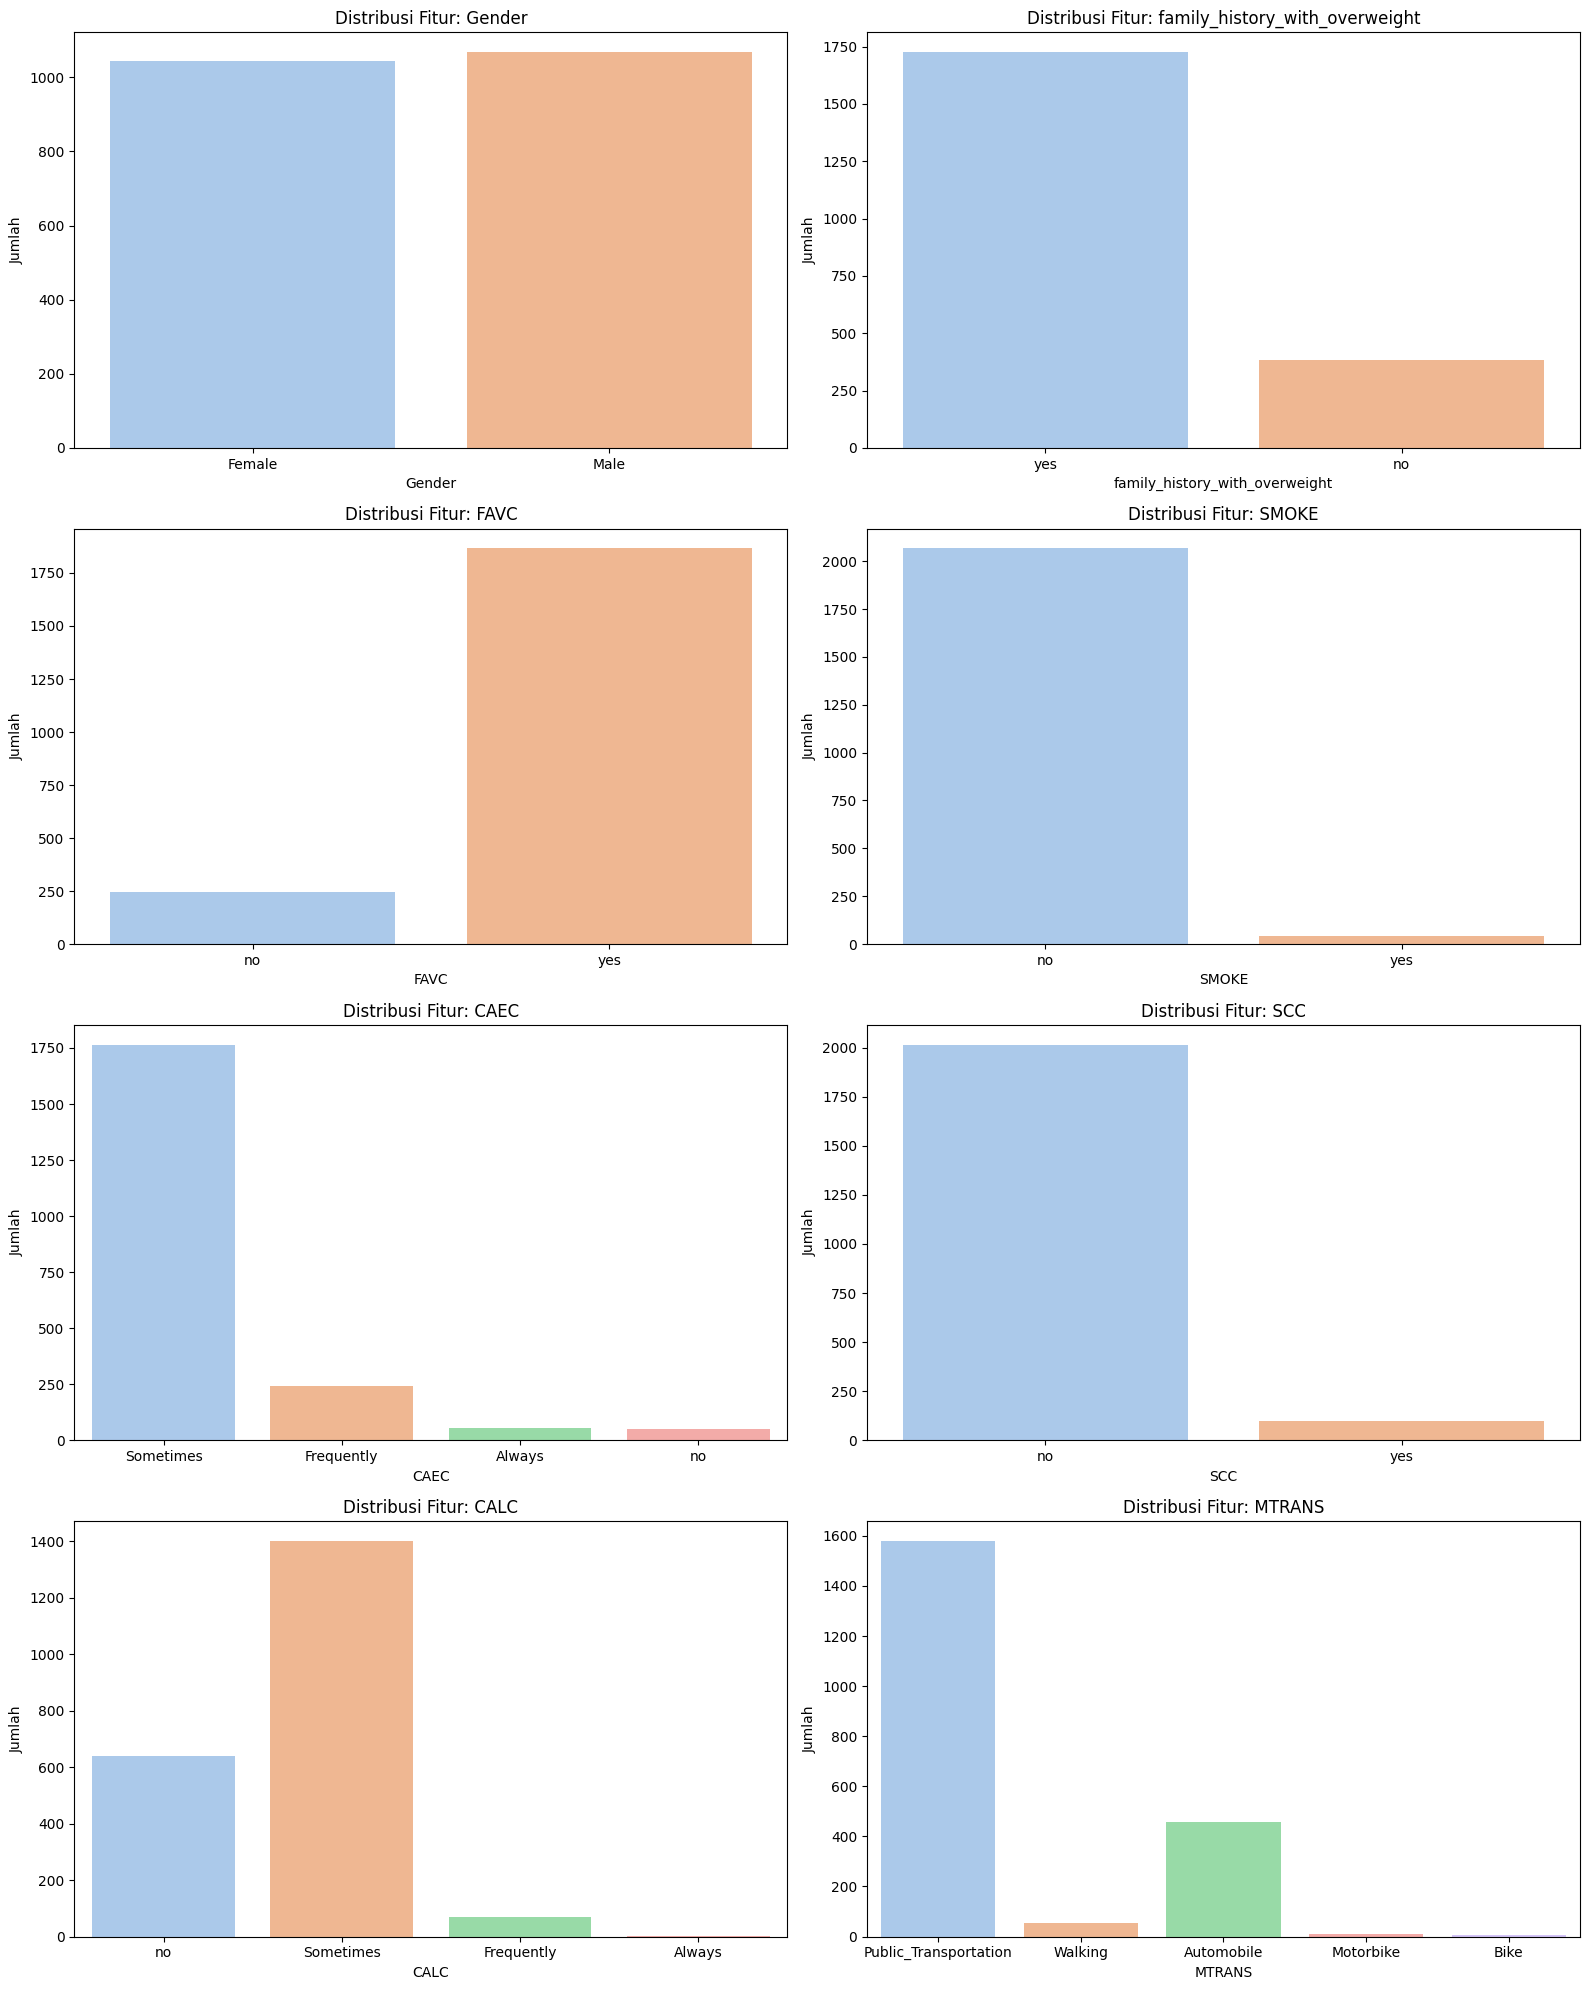

In [9]:
# DISTRIBUSI FITUR KATEGORIKAL
categorical_plot_cols = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
    'CAEC', 'SCC', 'CALC', 'MTRANS'
]

plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_plot_cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=data[col], palette='pastel')
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
plt.show()

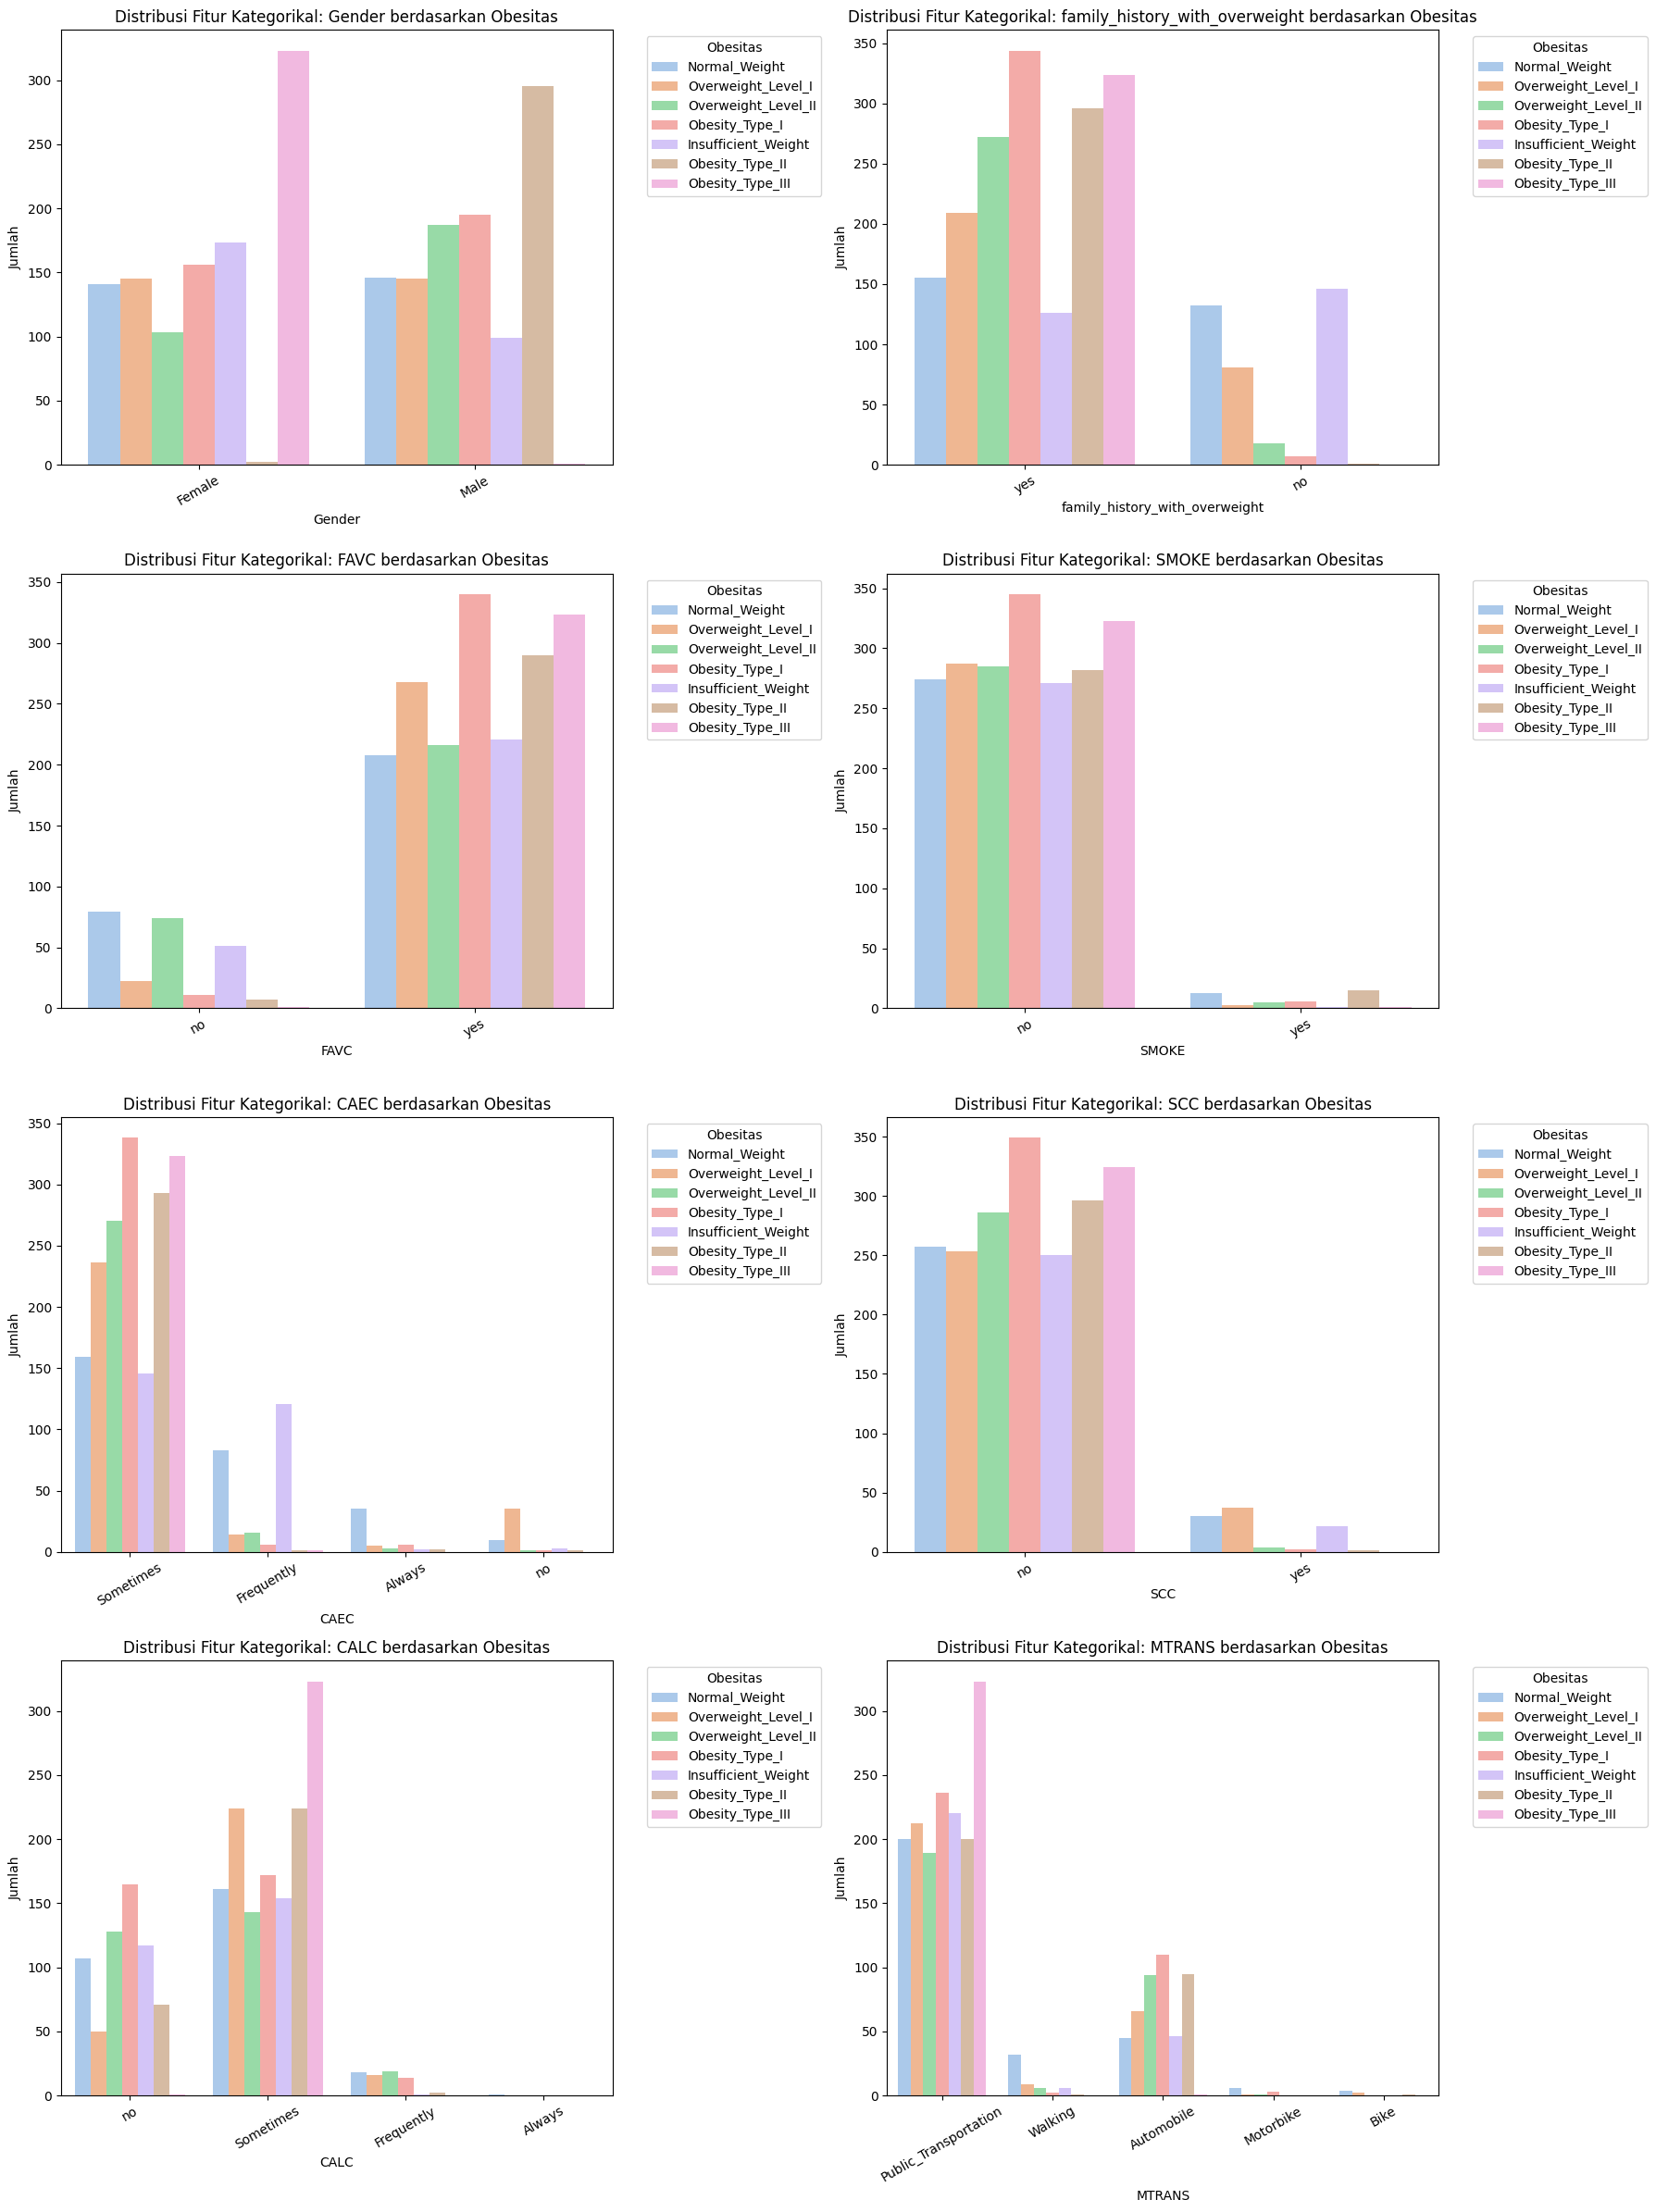

In [10]:
# DISTRIBUSI FITUR KATEGORIKAL Berdsarkan Obesitas
categorical_plot_cols = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
    'CAEC', 'SCC', 'CALC', 'MTRANS'
]

plt.figure(figsize=(18, 24))
for i, col in enumerate(categorical_plot_cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=data, x=col, hue='NObeyesdad', palette='pastel')
    plt.title(f'Distribusi Fitur Kategorikal: {col} berdasarkan Obesitas')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=30)
    plt.legend(title='Obesitas', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
plt.show()

di ke 8 fitur kategorical ternyata obesity itu memliki variasi di setiap fiturnya  yang dapat mempengaruhi si obesity

## **3. Distribusi Fitur Numerik**

Distribusi fitur numerik seperti Age, Height, Weight, dll., divisualisasikan menggunakan histplot. yang digunakan untuk Memvisualisasikan distribusi untuk setiap fitur numerik dalam dataset untuk memahami pola dan outlier potensial:

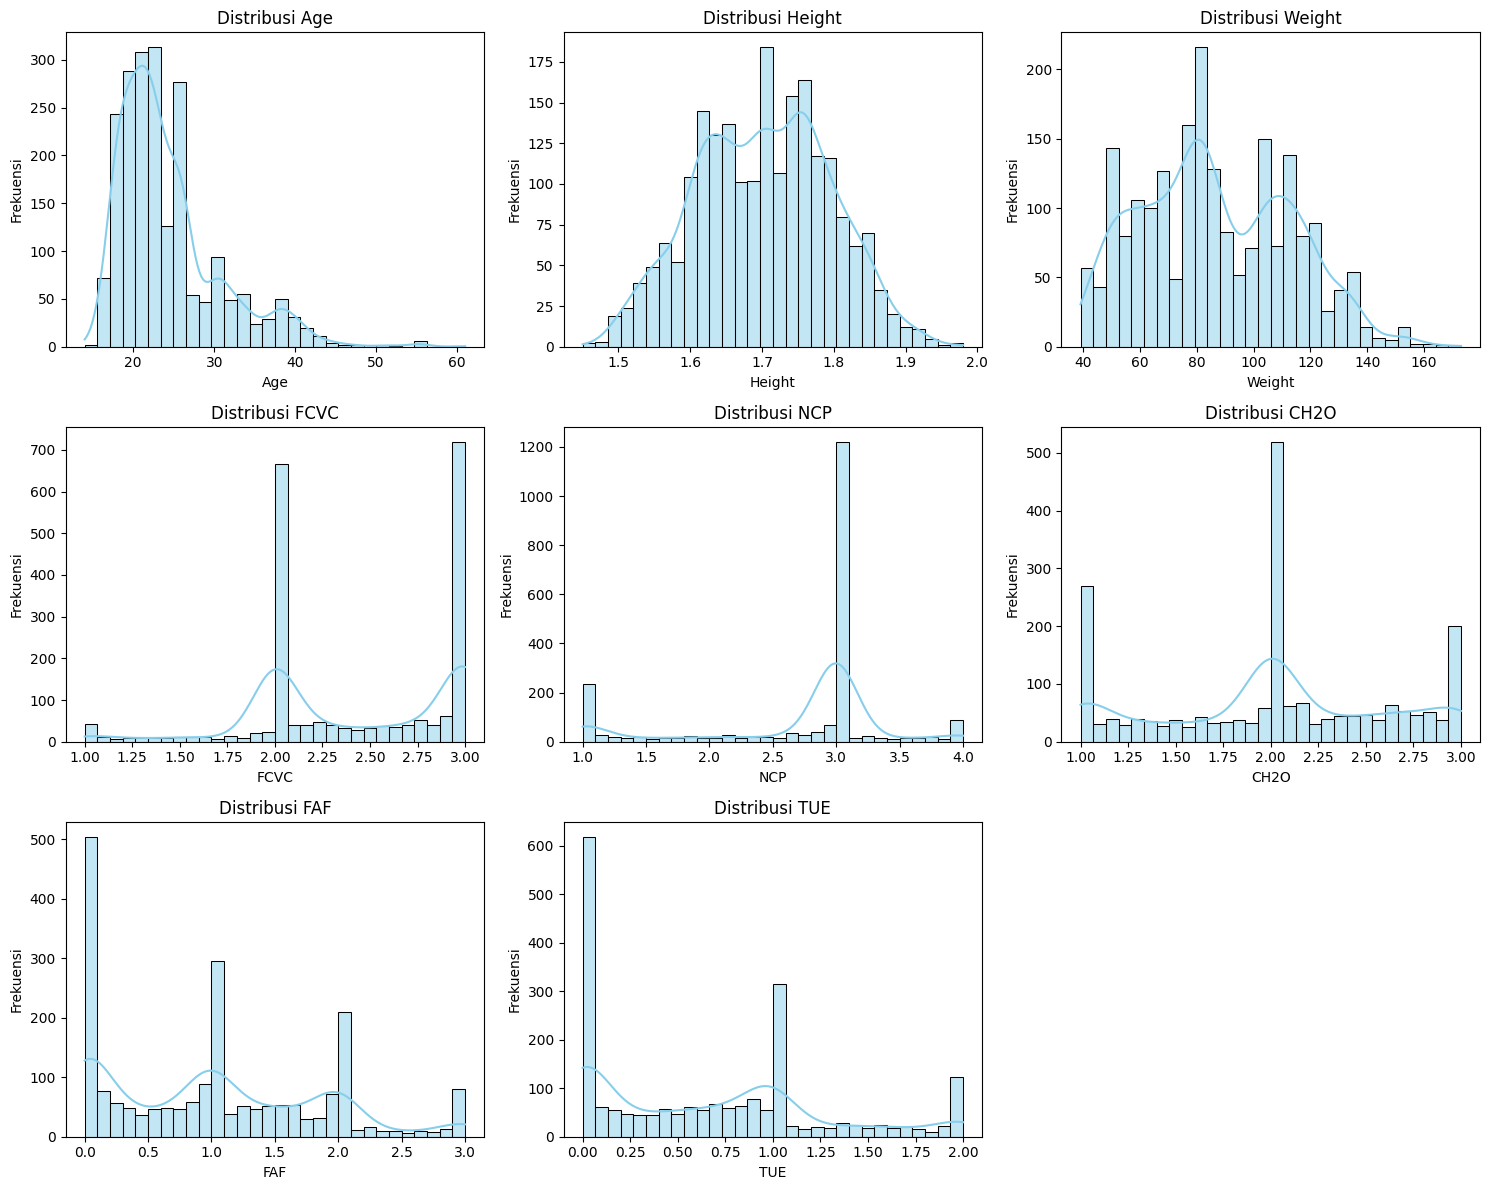

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misalnya data adalah nama DataFrame kamu
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Ukuran figure
plt.figure(figsize=(15, 12))

# Plot distribusi tiap fitur
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


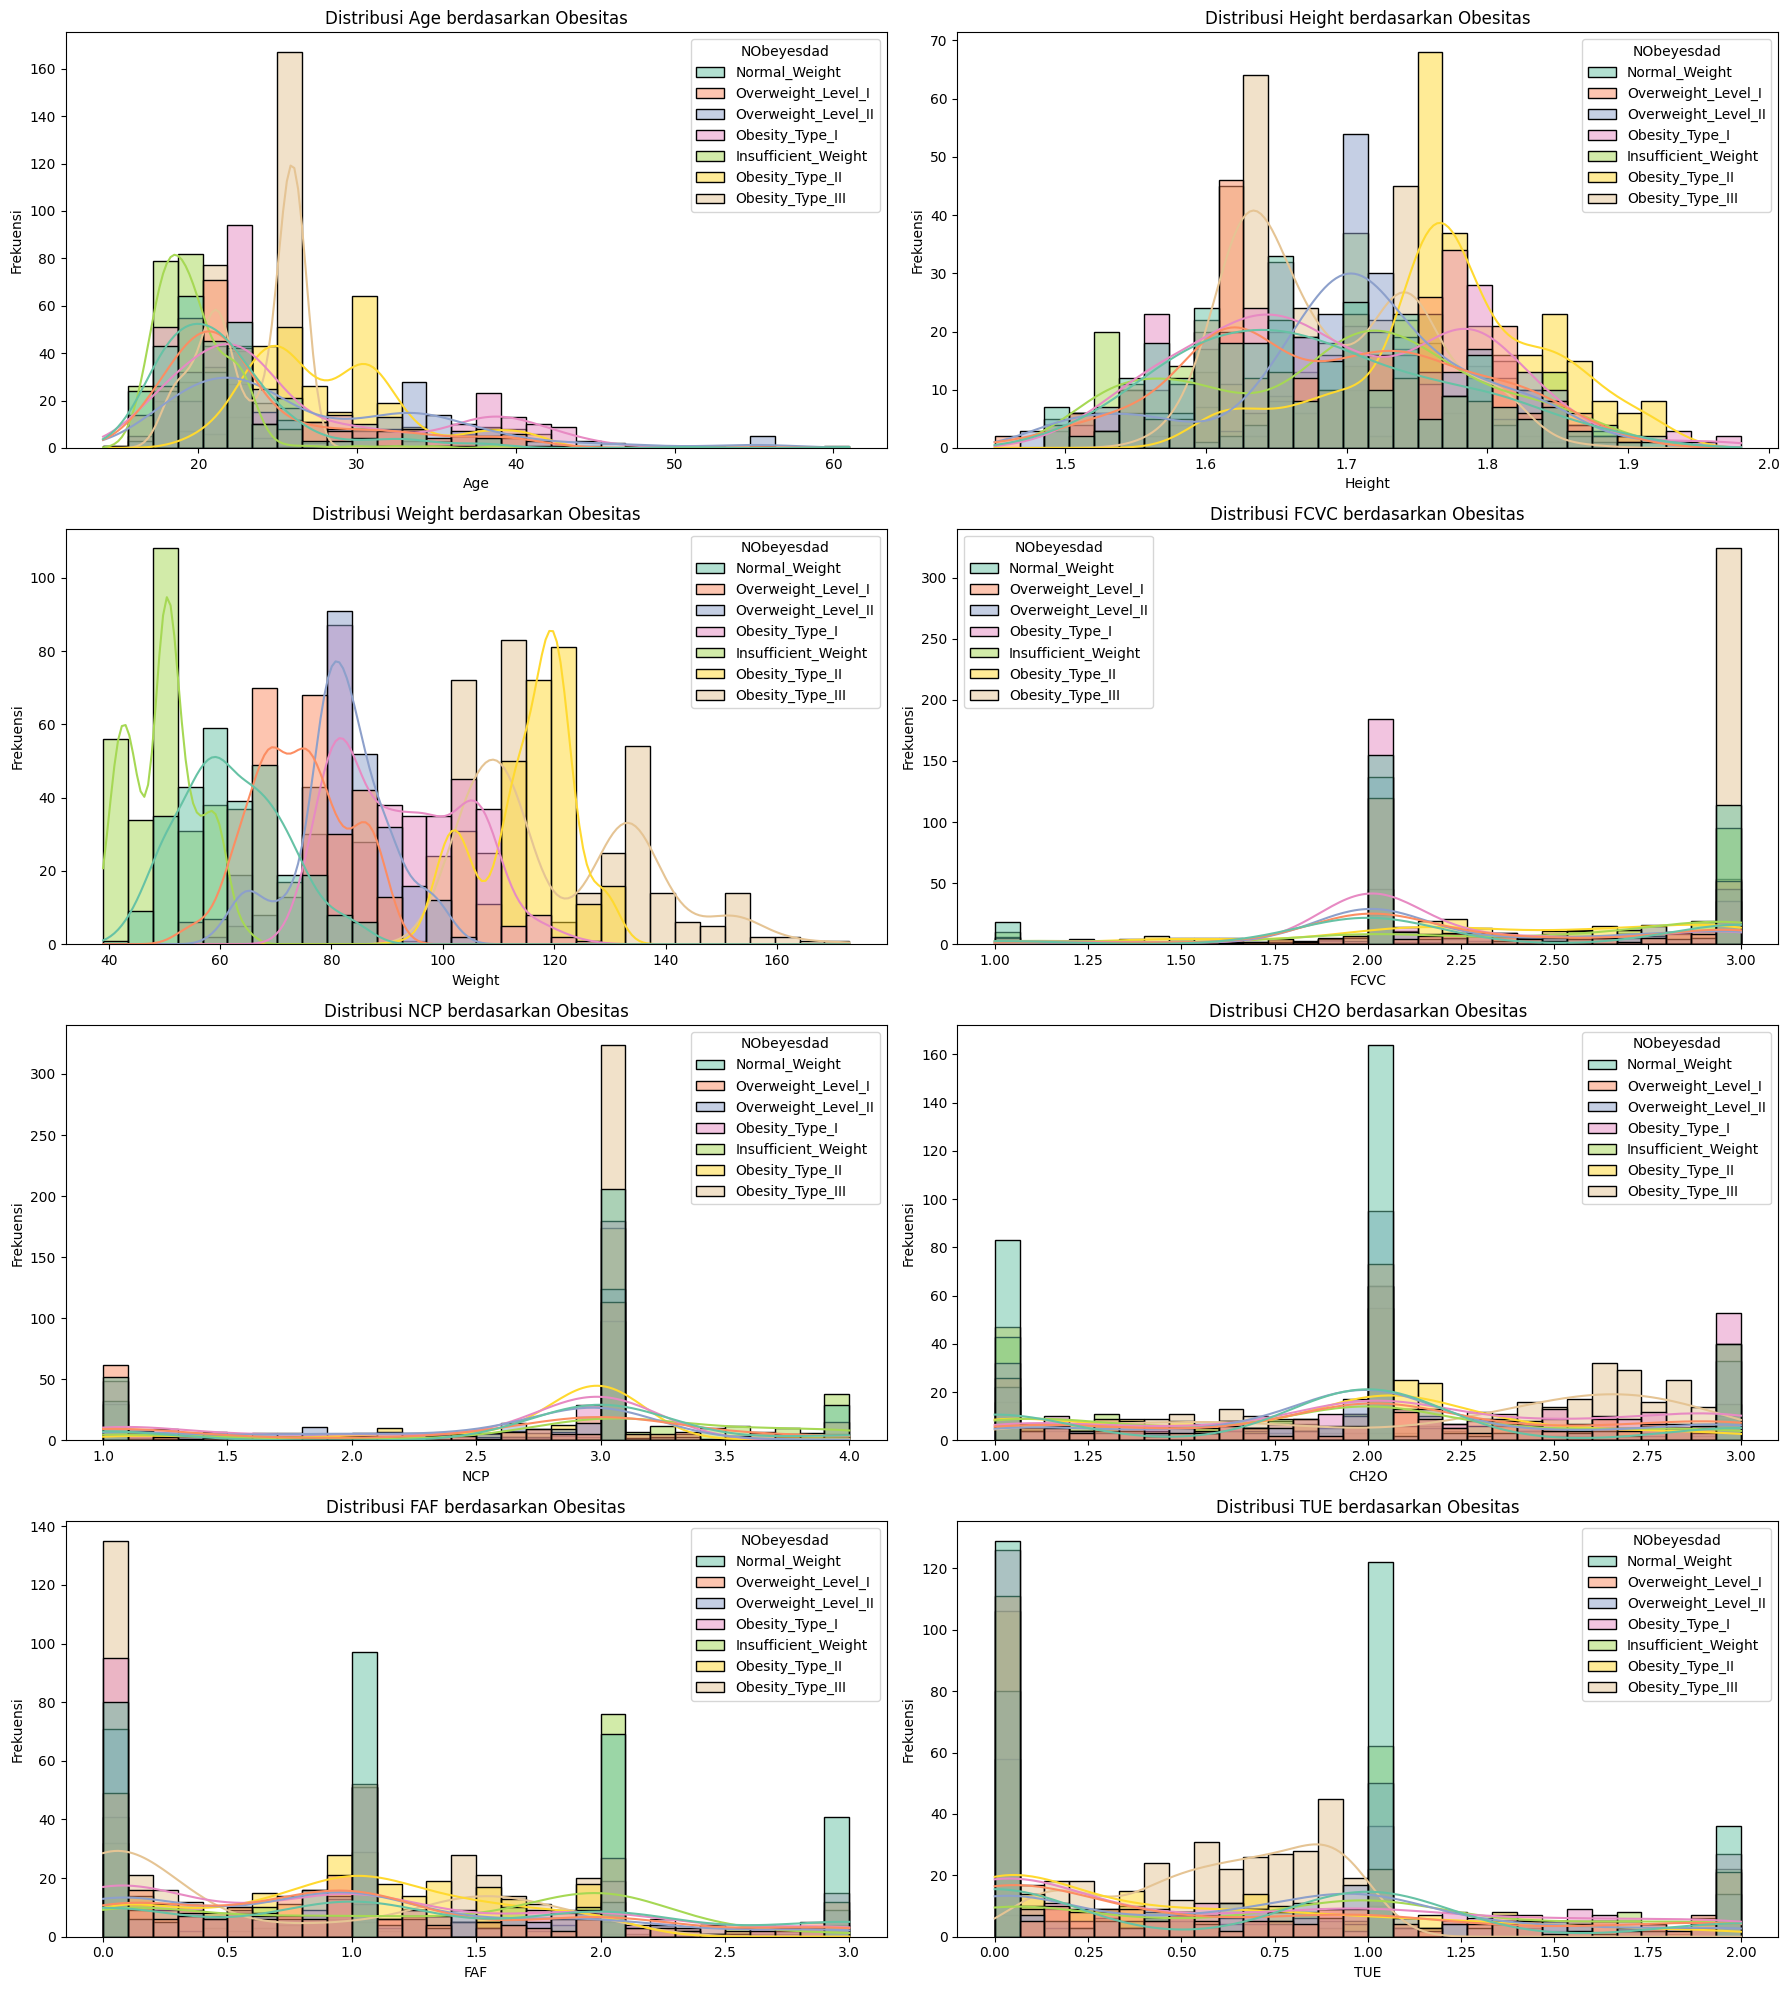

In [12]:
plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=data, x=col, hue='NObeyesdad', kde=True, bins=30, palette='Set2')
    plt.title(f'Distribusi {col} berdasarkan Obesitas')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()

plt.tight_layout()
plt.show()

Beberapa fitur memiliki distribusi tidak normal (skewed), yang bisa berdampak pada performa model.

## **4. Korelasi Antar Fitur Numerik**

Menghitung dan memvisualisasikan korelasi antar fitur numerik untuk memahami hubungan antar variabel:

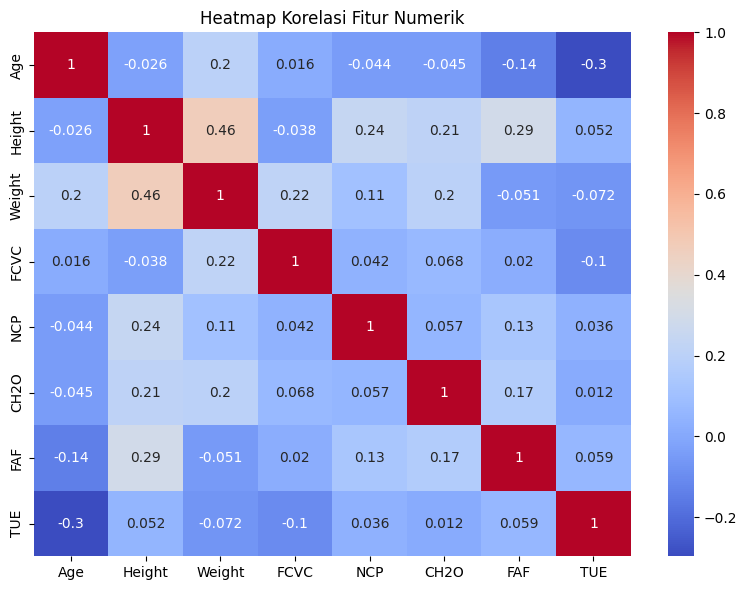

In [13]:
# Korelasi fitur numerik
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

Fitur seperti Height dan Weight memiliki korelasi yang signifikan terhadap label obesitas.

# **D. Data Preparation**

Tahap data preparation merupakan langkah krusial dalam mempersiapkan data untuk proses modeling. Beberapa tahapan yang akan dilakukan meliputi handling duplicate data, feature encoding, feature selection, data splitting, feature scaling, dan handling class imbalance.

## **a. Handling Duplicate Data**

Sebelum itu kita Menghapus duplikat data terlebih dahulu, karena penting untuk menghindari bias pada pelatihan model.

In [14]:
# Cek jumlah data duplikat sebelum dihapus
print("Jumlah data duplikat sebelum dihapus:", data.duplicated().sum())

# Hapus data duplikat
data = data.drop_duplicates()

# Cek ulang jumlah data duplikat setelah dihapus
print("Jumlah data duplikat setelah dihapus:", data.duplicated().sum())


Jumlah data duplikat sebelum dihapus: 24
Jumlah data duplikat setelah dihapus: 0


## **b. Feature Encoding**


pada tahap Encoding yaitu mengubah fitur non-numerik menjadi bentuk numerik agar bisa diproses oleh model machine learning.

In [15]:
# Encode data kategorikal
data_encoded = data.copy()
categorical_cols = [
    'Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
    'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'
]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

In [16]:
# Preview dataframe hasil encoding
data_encoded.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


## **c. Feature Selection**

Seleksi fitur membantu menyederhanakan model dan meningkatkan efisiensi serta akurasi.

In [17]:
# Pilih hanya fitur penting
important_features = ['Age', 'Height', 'Weight', 'FAVC', 'FCVC', 'TUE', 'MTRANS']
X = data_encoded[important_features]
y = data_encoded['NObeyesdad']  # target tetap sama

## **d. Data Splitting**


Pembagian data yang seimbang (stratify) menjaga proporsi kelas target di data latih dan uji.

In [18]:
# Pisahkan fitur dan target
X = data_encoded.drop(columns=['NObeyesdad'])
y = data_encoded['NObeyesdad']

In [19]:
# Binarisasi label untuk multiclass ROC AUC
classes = np.unique(y)

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [21]:
# Binarisasi label y_test untuk ROC AUC (multiclass)
y_test_bin = label_binarize(y_test, classes=classes)

## **e. Feature Scaling**

Scaling penting agar model tidak berat sebelah terhadap fitur bernilai besar seperti Weight. atau data agar sama distribusinya

In [22]:
# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **f. Handling Imabalance Data**

lalu pada tahap handling imbalance data kita menggunakan SMOTE (Synthetic Minority Over-sampling Technique) yaitu menyeimbangkan data dengan membuat sampel sintetis untuk kelas minoritas.

In [23]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [24]:
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())
print(f"Percentage: {pd.Series(y_train).value_counts(normalize=True) * 100}")

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
print(f"Percentage: {pd.Series(y_train_balanced).value_counts(normalize=True) * 100}")

Class distribution before SMOTE:
NObeyesdad
2    281
4    259
3    237
6    232
1    225
5    221
0    214
Name: count, dtype: int64
Percentage: NObeyesdad
2    16.836429
4    15.518274
3    14.200120
6    13.900539
1    13.481126
5    13.241462
0    12.822049
Name: proportion, dtype: float64

Class distribution after SMOTE:
NObeyesdad
3    281
6    281
0    281
5    281
1    281
4    281
2    281
Name: count, dtype: int64
Percentage: NObeyesdad
3    14.285714
6    14.285714
0    14.285714
5    14.285714
1    14.285714
4    14.285714
2    14.285714
Name: proportion, dtype: float64


Insight Umum Sebelum Modeling:
- Dataset ini cukup bersih dan tidak mengandung missing values.

- Ada ketidakseimbangan kelas (class imbalance) yang berhasil diatasi dengan SMOTE.

- Korelasi antar fitur cukup rendah, menunjukkan keunikan informasi tiap fitur.

- Seleksi fitur dilakukan secara manual, tetapi cukup tepat berdasarkan korelasi dan relevansi.




# **E. Modelling**

## **1. SVM**

In [25]:
# Support Vector Machine (SVM)
print("\n=== Support Vector Machine (SVM) ===")
svm = SVC(probability=True, kernel='rbf', random_state=42)
svm.fit(X_train_balanced, y_train_balanced)

y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)

# Evaluasi MetriK
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='macro')
rec_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
roc_auc_svm = roc_auc_score(y_test_bin, y_proba_svm, average='macro', multi_class='ovr')

print(f"Accuracy     : {acc_svm:.4f}")
print(f"Precision    : {prec_svm:.4f}")
print(f"Recall       : {rec_svm:.4f}")
print(f"F1 Score     : {f1_svm:.4f}")
print(f"ROC AUC      : {roc_auc_svm:.4f}")


=== Support Vector Machine (SVM) ===
Accuracy     : 0.8923
Precision    : 0.8912
Recall       : 0.8889
F1 Score     : 0.8893
ROC AUC      : 0.9866


## **2. Random Forest**

In [26]:
print("\n=== Random Forest ===")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)

# Evaluasi Metrik
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
roc_auc_rf = roc_auc_score(y_test_bin, y_proba_rf, average='macro', multi_class='ovr')

print(f"Accuracy     : {acc_rf:.4f}")
print(f"Precision    : {prec_rf:.4f}")
print(f"Recall       : {rec_rf:.4f}")
print(f"F1 Score     : {f1_rf:.4f}")
print(f"ROC AUC      : {roc_auc_rf:.4f}")


=== Random Forest ===
Accuracy     : 0.9569
Precision    : 0.9572
Recall       : 0.9555
F1 Score     : 0.9557
ROC AUC      : 0.9968


## **3. Gradient Boosting**

In [27]:
print("\n=== Gradient Boosting ===")
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_balanced, y_train_balanced)

y_pred_gb = gb.predict(X_test_scaled)
y_proba_gb = gb.predict_proba(X_test_scaled)

# Evaluasi Metrik
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb, average='macro')
rec_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
roc_auc_gb = roc_auc_score(y_test_bin, y_proba_gb, average='macro', multi_class='ovr')

print(f"Accuracy     : {acc_gb:.4f}")
print(f"Precision    : {prec_gb:.4f}")
print(f"Recall       : {rec_gb:.4f}")
print(f"F1 Score     : {f1_gb:.4f}")
print(f"ROC AUC      : {roc_auc_gb:.4f}")


=== Gradient Boosting ===
Accuracy     : 0.9737
Precision    : 0.9731
Recall       : 0.9739
F1 Score     : 0.9735
ROC AUC      : 0.9989


# **F. Evaluation**

Pada tahap ini kita akan evaluasi terhadap model yang sudah kita buat tadi dari berbagai matrik yang kita gunakan.

## **Classification Report**

In [28]:
#SVM
print("\nClassification Report SVM:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

#Random Forest
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#Gradient Boosting
print("\nClassification Report GB:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Classification Report SVM:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.69      0.79      0.74        57
           2       0.97      0.93      0.95        70
           3       0.97      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.81      0.80      0.81        55
           6       0.87      0.79      0.83        58

    accuracy                           0.89       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.90      0.89      0.89       418

Confusion Matrix:
 [[50  3  0  0  0  0  0]
 [ 4 45  0  0  0  4  4]
 [ 0  1 65  1  0  1  2]
 [ 0  1  0 59  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  9  1  0  0 44  1]
 [ 0  6  1  0  0  5 46]]

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.84      0.95     

Dari hasil classification repot Model Support Vector Machine (SVM) menghasilkan akurasi sebesar 89% dengan performa yang cukup baik secara umum, namun masih kurang stabil pada kelas-kelas tertentu seperti kelas 1, 5, dan 6. Random Forest menunjukkan peningkatan performa dengan akurasi 96% dan hasil evaluasi yang stabil di hampir semua kelas, menjadikannya pilihan yang seimbang antara akurasi dan interpretabilitas. Sementara itu, Gradient Boosting menjadi model terbaik dengan akurasi mencapai 97% dan skor f1 yang sangat tinggi pada semua kelas, menandakan konsistensi dan presisi yang sangat baik. Oleh karena itu, Gradient Boosting direkomendasikan jika akurasi dan stabilitas menjadi prioritas utama.

In [29]:
# Simpan semua hasil model dalam dictionary untuk ringkasan dan visualisasi ROC
models = {
    'SVM': svm,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

## **ROC**

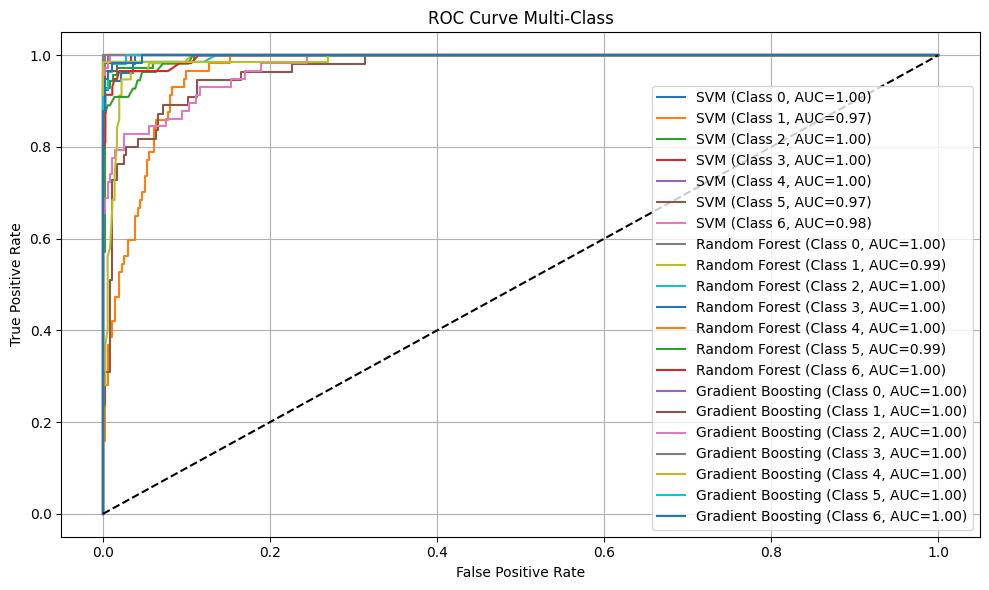

In [30]:
# ROC Curve Multi-Class
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Class {classes[i]}, AUC={auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Multi-Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Grafik ROC di atas menunjukkan kinerja klasifikasi dari tiga model (SVM, Random Forest, dan Gradient Boosting) untuk masing-masing kelas. ROC Curve menampilkan hubungan antara True Positive Rate dan False Positive Rate. Semakin dekat kurva ke pojok kiri atas, semakin baik performa model.

Dari grafik ini terlihat bahwa model Gradient Boosting dan Random Forest memiliki kurva ROC yang hampir sempurna dengan nilai AUC (Area Under Curve) sebesar 1.00 di hampir semua kelas. Ini menunjukkan bahwa kedua model tersebut memiliki kemampuan klasifikasi yang sangat tinggi. Sementara itu, model SVM juga menunjukkan performa yang baik, namun dengan AUC sedikit lebih rendah di beberapa kelas, seperti kelas 1 dan 5. Secara keseluruhan, Gradient Boosting dan Random Forest unggul dalam hal separabilitas antar kelas berdasarkan ROC Curve.

## **Cross-Validation**

In [31]:
# Buat objek stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Simpan skor CV
cv_results = {}

# Cross-validation untuk SVM
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_results['SVM'] = svm_scores

# Cross-validation untuk Random Forest
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_results['Random Forest'] = rf_scores

# Cross-validation untuk Gradient Boosting
gb_scores = cross_val_score(gb, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_results['Gradient Boosting'] = gb_scores

# Tampilkan hasil
for model_name, scores in cv_results.items():
    print(f"\n{model_name} Cross-Validation Accuracy:")
    print(f"Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f} | Std Dev: {scores.std():.4f}")



SVM Cross-Validation Accuracy:
Scores: [0.86826347 0.88922156 0.84431138 0.89520958 0.86186186]
Mean Accuracy: 0.8718 | Std Dev: 0.0185

Random Forest Cross-Validation Accuracy:
Scores: [0.94610778 0.97005988 0.9251497  0.9491018  0.96096096]
Mean Accuracy: 0.9503 | Std Dev: 0.0152

Gradient Boosting Cross-Validation Accuracy:
Scores: [0.94011976 0.97005988 0.94610778 0.9491018  0.95795796]
Mean Accuracy: 0.9527 | Std Dev: 0.0104


Selanjutnya Cross-validation dilakukan untuk mengevaluasi konsistensi performa model pada berbagai subset data. Hasilnya menunjukkan bahwa **Gradient Boosting** memiliki rata-rata akurasi tertinggi sebesar **95.27%** dengan standar deviasi paling kecil (**0.0104**), menandakan performanya stabil dan sangat baik di seluruh lipatan data.

**Random Forest** menyusul dengan akurasi rata-rata **95.03%** dan deviasi **0.0152**, juga menunjukkan kinerja yang kuat dan konsisten.

Sementara itu, **SVM** memiliki akurasi rata-rata lebih rendah yaitu **87.18%** dan standar deviasi **0.0185**, yang mengindikasikan bahwa model ini kurang stabil dibanding dua model lainnya.

Secara keseluruhan, Gradient Boosting adalah model paling andal berdasarkan hasil cross-validation.

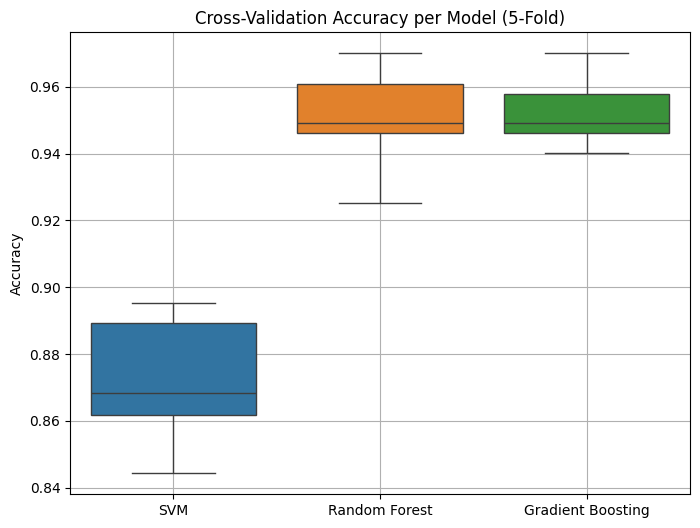

In [32]:
# Visualisasi cross-val score
cv_df = pd.DataFrame(cv_results)

plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_df)
plt.title("Cross-Validation Accuracy per Model (5-Fold)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Boxplot menunjukkan bahwa Gradient Boosting dan Random Forest memiliki akurasi tinggi dan konsisten (variasi kecil), sedangkan SVM memiliki akurasi lebih rendah dan variasi hasil yang lebih besar. Ini menguatkan bahwa Gradient Boosting adalah model paling stabil dan akurat di antara ketiganya berdasarkan 5-fold cross-validation.


## **Perbandingan Model**

In [33]:
# Buat tabel perbandingan
summary_df = pd.DataFrame([
    ['SVM', acc_svm, prec_svm, rec_svm, f1_svm, roc_auc_svm],
    ['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf, roc_auc_rf],
    ['Gradient Boosting', acc_gb, prec_gb, rec_gb, f1_gb, roc_auc_gb]
], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

print("\n=== Ringkasan Evaluasi Semua Model ===")
print(summary_df)



=== Ringkasan Evaluasi Semua Model ===
               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0                SVM  0.892344   0.891191  0.888928  0.889259  0.986589
1      Random Forest  0.956938   0.957155  0.955509  0.955709  0.996843
2  Gradient Boosting  0.973684   0.973112  0.973949  0.973463  0.998942


Tabel di atas menunjukkan performa tiga model klasifikasi: SVM, Random Forest, dan Gradient Boosting berdasarkan lima metrik evaluasi utama.

Model **Gradient Boosting** menunjukkan performa terbaik secara keseluruhan dengan **akurasi tertinggi (97.36%)**, serta skor **Precision, Recall, F1 Score, dan ROC AUC** yang sangat tinggi, mendekati 1. Ini mengindikasikan bahwa model ini sangat andal dalam mengenali setiap kelas dengan keseimbangan presisi dan sensitivitas yang baik.

Model **Random Forest** juga menunjukkan performa yang sangat baik dengan **akurasi 95.69%** dan metrik lainnya hampir setara dengan Gradient Boosting. Ini menunjukkan bahwa model ini juga sangat kuat dan dapat dijadikan alternatif jika waktu pelatihan atau kompleksitas menjadi pertimbangan.

Model **SVM** memiliki performa yang cukup baik namun masih di bawah dua model lainnya, dengan **akurasi 89.23%**. Meskipun begitu, nilai **ROC AUC-nya masih tinggi (0.98)**, menandakan bahwa SVM masih mampu membedakan antar kelas dengan cukup baik.

Secara keseluruhan, **Gradient Boosting** menjadi pilihan terbaik untuk kasus ini, diikuti oleh **Random Forest**, dan **SVM** di posisi terakhir dari segi performa.

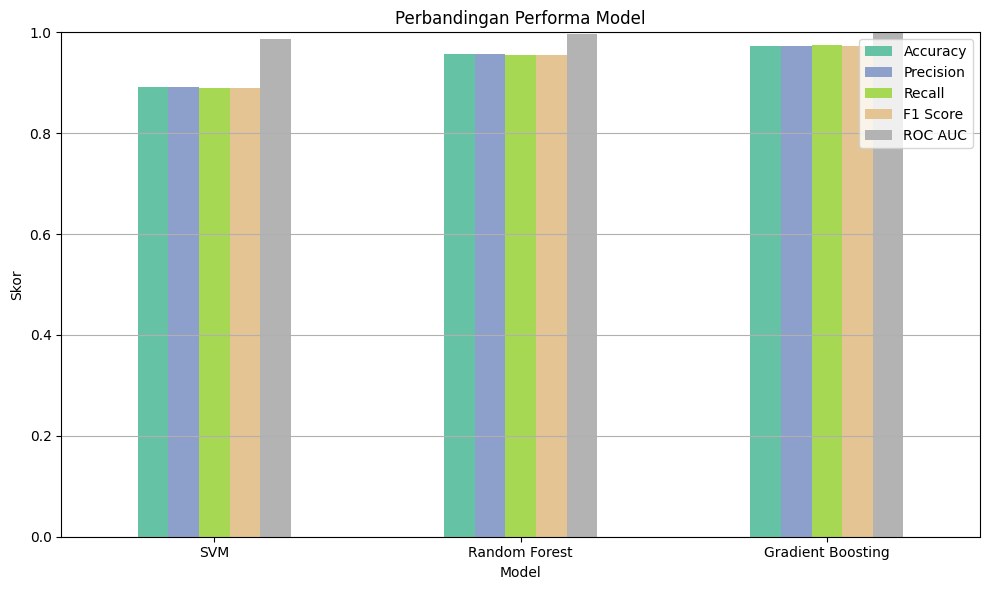

In [34]:
# Bar chart performa model
summary_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].plot(
    kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='Set2'
)
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Terakhir, semua hasil evaluasi dari model ditampilkan dalam bentuk grafik batang untuk membandingkan performa antar model secara visual berdasarkan metrik evaluasi yang telah disebutkan.